### Analysis of Historical Trends in Crimes Against Women in India (2001-2014)

### Introduction

From 2001 to 2014, India witnessed growing awareness and discussions about crimes against women. This period saw increased reporting, media coverage, and policy discussions surrounding the safety and well-being of women. This analysis explores historical data to identify trends, patterns, and regional disparities in crimes against women across India’s states and Union Territories during these critical years.

#### Objectives

Understand historical crime trends against women across India.

Identify which states had the highest and lowest reported incidents for major crime.

In [176]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [137]:
# load data
df = pd.read_csv('crimes_against_women_2001-2014.csv')

Data Overview

In [138]:
# Displaying first 5 rows of dataset
df.head(3)

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0


In [139]:
# checking info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


Data Cleaning and Preparation

In [140]:
#drop 'Unnamed: 0' column, cause its irrelevant
df.drop('Unnamed: 0', axis=1, inplace=True)

In [141]:
# checking for unique states in dataset
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [142]:
# NOTICE: there are dUplicATe states/uts in UPPER & lower form

# convert all 'STATE/UT' names to UPPER CASE
df['STATE/UT'] = df['STATE/UT'].apply(lambda state: state.upper())

In [143]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'A&N ISLANDS',
       'D&N HAVELI', 'DELHI UT', 'TELANGANA'], dtype=object)

In [144]:
# some values like 'A & N ISLANDS' and 'A&N ISLANDS' are same. 
# taking off the space before and after '&'
df['STATE/UT'] = df['STATE/UT'].apply(lambda state:state.replace(" & ","&"))

In [145]:
# replace 'DELHI UT' to 'DELHI' since they mean same
df['STATE/UT'] = df['STATE/UT'].replace('DELHI UT', 'DELHI')

In [146]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU&KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A&N ISLANDS', 'CHANDIGARH', 'D&N HAVELI',
       'DAMAN&DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

In [147]:
# convert all 'DISTRICT' names to upper
df['DISTRICT'] = df['DISTRICT'].apply(lambda district: district.upper())

Adding column

In [148]:
# assigning ONLY crime columns list to a crimes_columns variable
crimes_columns = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls']

In [149]:
# summing up total crime count in each rows then assigning the values to a new column "Tatal Crime"
df['Total crime'] = df[crimes_columns].sum(axis=1)

In [150]:
# inspecting newly created df
df.head(3)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total crime
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456


In [151]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

### DATA VISUALIZATION

In [237]:
# setting the style of plot to 'ggplot'
plt.style.use('bmh')

Proportion of different Crimes against Women (2001-2014)

In [214]:
# sum of crime count for each crimes
crimes_total = df[crimes_columns].sum()
crimes_total

Rape                                                    619158
Kidnapping and Abduction                                746198
Dowry Deaths                                            215480
Assault on women with intent to outrage her modesty    1212258
Insult to modesty of Women                              292756
Cruelty by Husband or his Relatives                    2233888
Importation of Girls                                      1872
dtype: int64

Text(0.5, 1.0, 'Proportion of different Crimes against Women (2001-2014)')

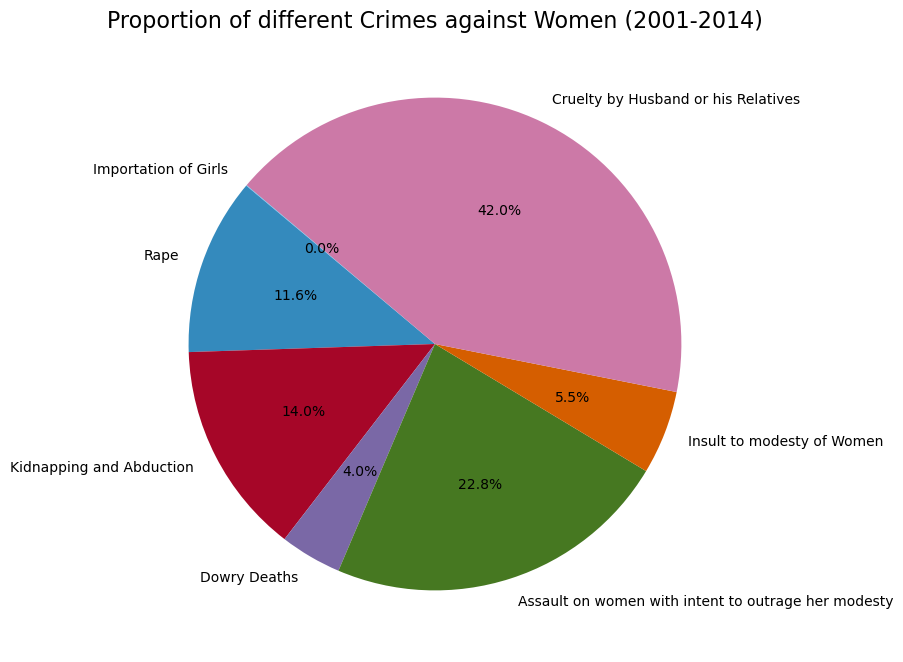

In [240]:
plt.figure(figsize=(10,8))
plt.pie(crimes_total, 
    explode=None,
    labels=crimes_total.index,
    autopct = '%1.1f%%',
    pctdistance=0.6,
    startangle=140)
plt.title('Proportion of different Crimes against Women (2001-2014)', fontsize=16)

*Trends Over Time (2001-2014)*

In [218]:
# total occurence of crime count grouped by year 
total_crime_trends = df.groupby('Year').sum()['Total crime']
total_crime_trends 

Year
2001    261450
2002    262224
2003    262728
2004    287230
2005    287046
2006    308316
2007    349842
2008    373232
2009    389670
2010    410018
2011    438284
2012    465056
2013    591792
2014    634722
Name: Total crime, dtype: int64

Text(0.5, 1.0, 'Evolution of Total Crimes Against Women (2001-2014)')

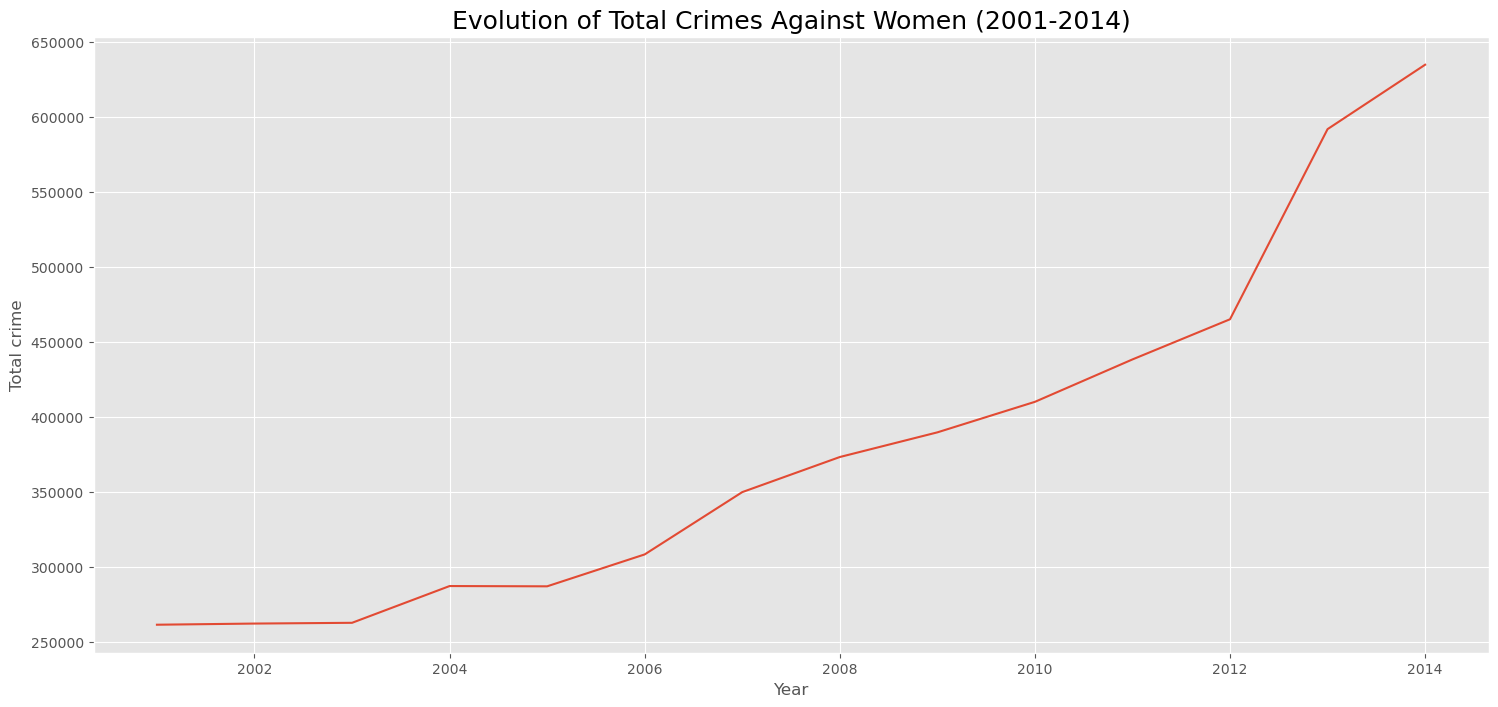

In [220]:
# visualizing the rate of crime over years
plt.figure(figsize = (18,8))
sns.lineplot(total_crime_trends)
plt.title('Evolution of Total Crimes Against Women (2001-2014)', fontsize=18)

Different Crime Trends Over the Years

In [153]:
# total occurence of each crime grouped by year 
crime_trends = df.groupby('Year').sum()[crimes_columns]  #selecting ONLY crime columns
crime_trends 

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228
2002,32746,29012,13644,67886,20310,98474,152
2003,31694,26592,12416,65878,24650,101406,92
2004,36466,31156,14052,69134,20002,116242,178
2005,36718,31500,13574,68350,19968,116638,298
2006,38696,34828,15236,73234,19932,126256,134
2007,41474,40832,16186,77468,21900,151860,122
2008,42934,45878,16344,80826,24428,162688,134
2009,42794,51482,16766,77422,22018,179092,96


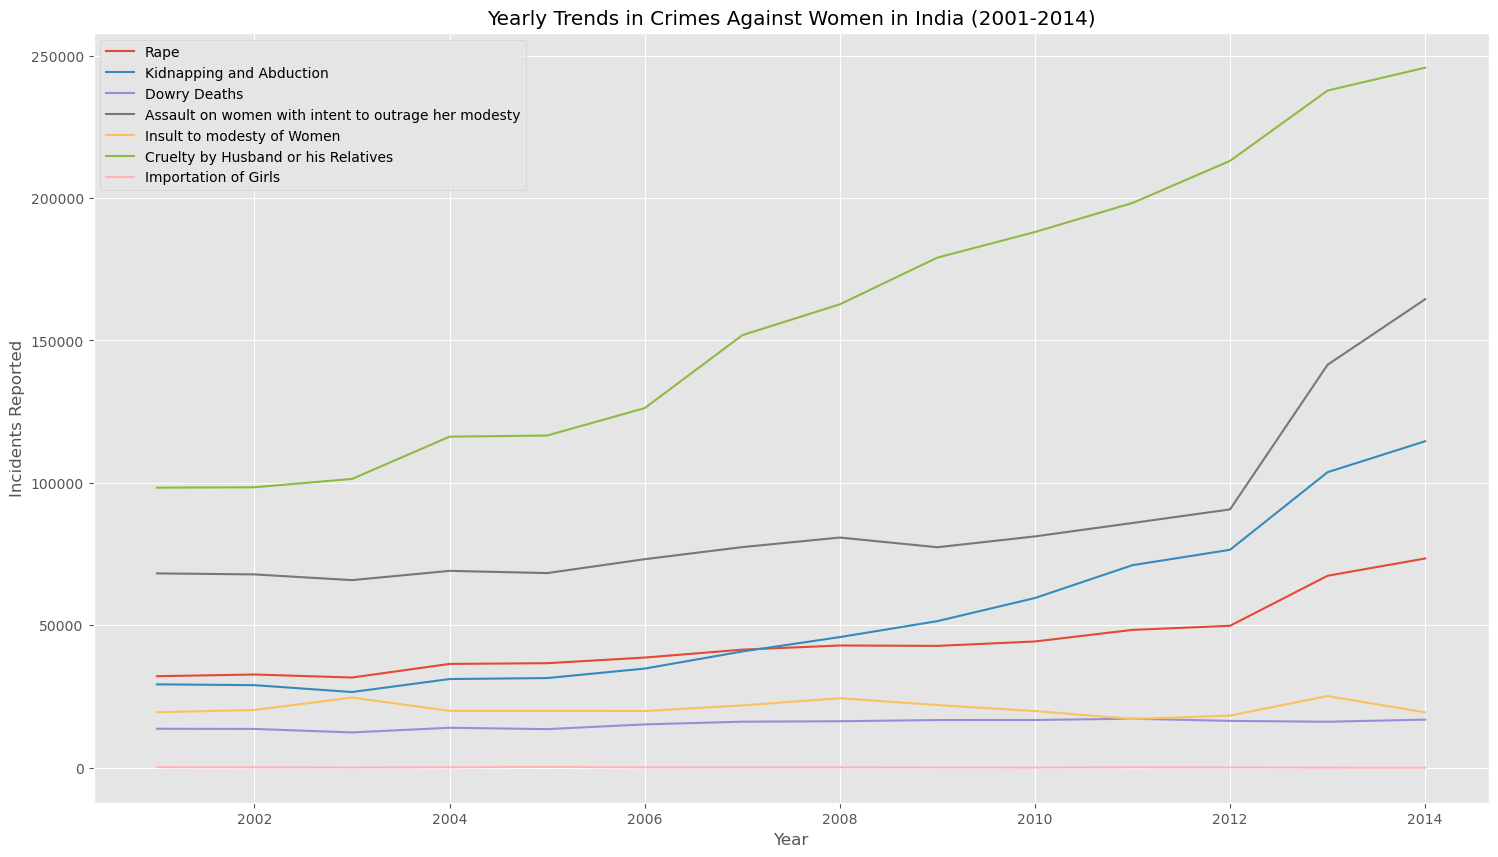

In [154]:
#Visualizing Yearly trends for each type of crime
plt.figure(figsize=(18, 10))

sns.lineplot(data=crime_trends, dashes=False)
plt.title('Yearly Trends in Crimes Against Women in India (2001-2014)')
plt.xlabel('Year')
plt.ylabel('Incidents Reported')
plt.show()

*State-Wise Analysis*

In [204]:
# total crime occurence grouped by each states and sorting by total count
state_crimes = df.groupby('STATE/UT').sum().sort_values(by='Total crime', ascending=False)

# showing only crimes column
state_crimes = state_crimes[crimes_columns]
state_crimes

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,
UTTAR PRADESH,51150,135906,57256,91212,53130,193738,6
ANDHRA PRADESH,32150,34504,13844,126952,86964,280906,34
WEST BENGAL,47876,61158,12308,66908,5348,344124,254
RAJASTHAN,45684,66278,11854,83362,794,262200,14
MADHYA PRADESH,90996,35608,21090,195478,20964,102816,134
MAHARASHTRA,48974,30368,9696,114704,32634,193202,6
ASSAM,40190,62074,3268,38256,254,115300,22
KERALA,20030,4452,700,80438,7930,111626,0
GUJARAT,11644,34670,1108,23186,3230,146468,0


Crime Count across all States

Text(248.83333333333337, 0.5, 'Total Crime Count')

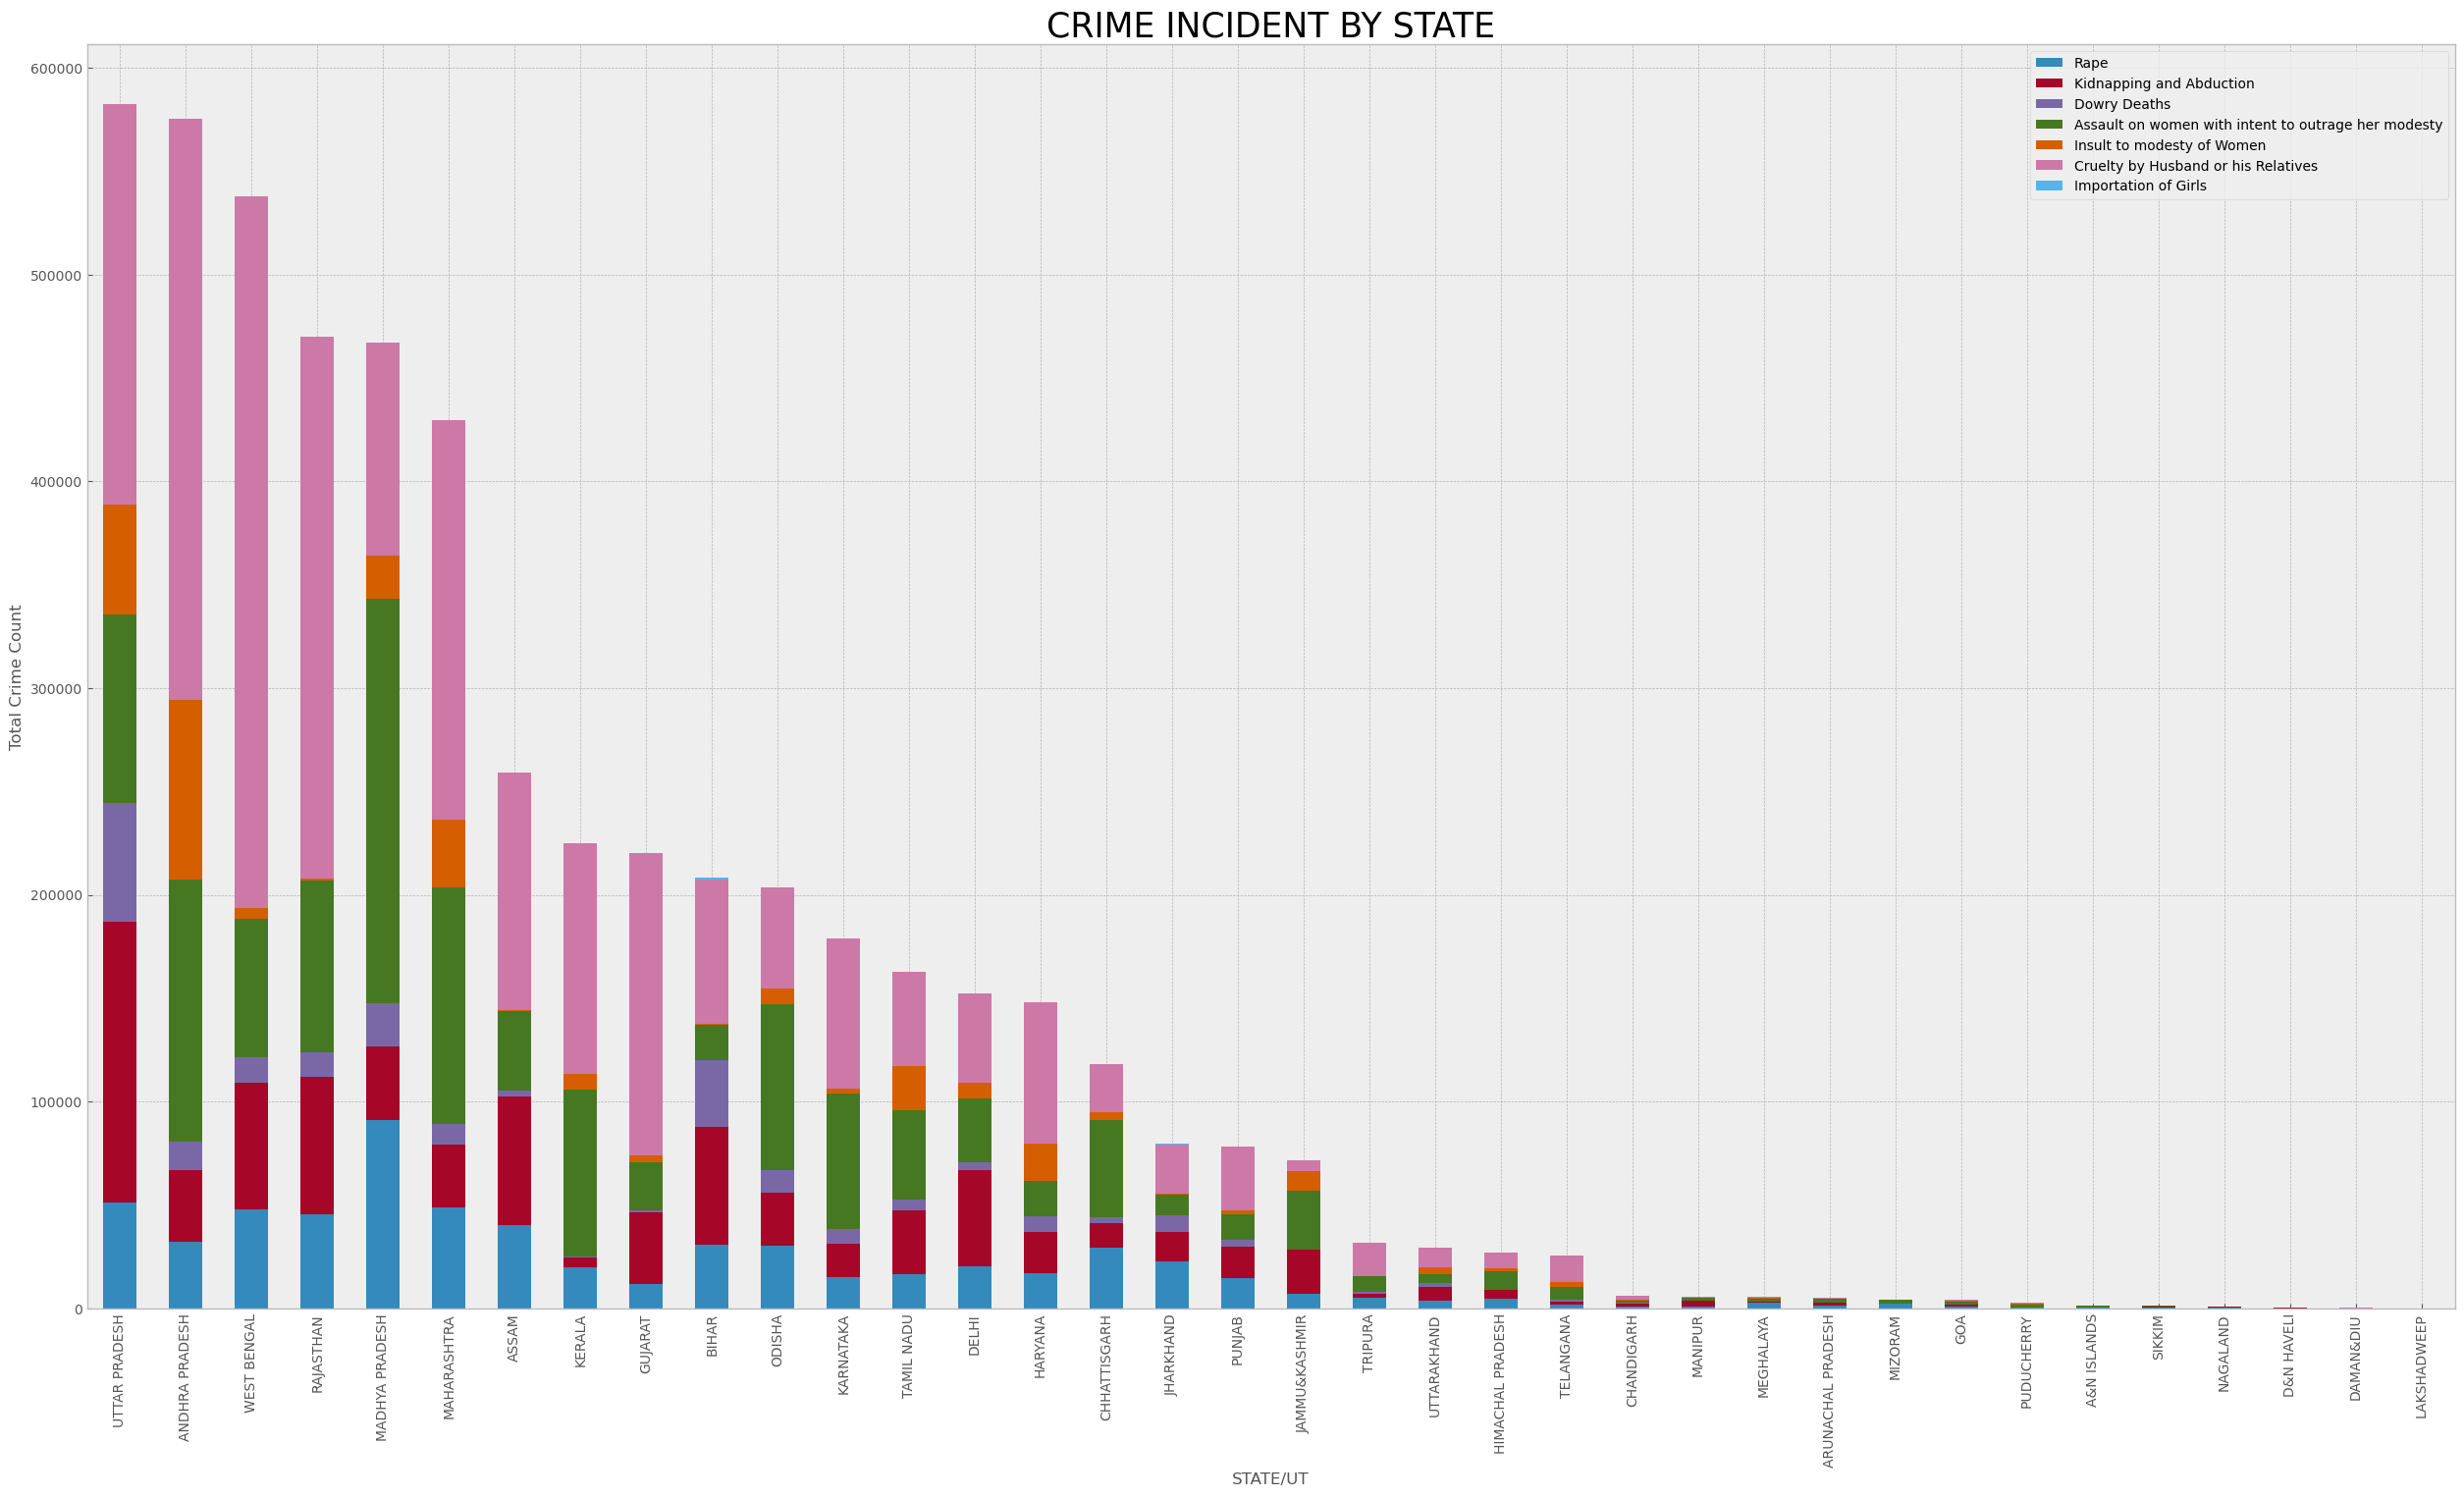

In [239]:
# visualizing crimes in all states
state_crimes.plot(kind='bar', stacked=True, figsize=(25,15))
plt.tight_layout()
plt.title('CRIME INCIDENT BY STATE', fontsize=25)
plt.ylabel('Total Crime Count')

Rape Cases Across Different States in the Country

In [156]:
# grouping states and the total occurence for Rape
rape = state_crimes[['Rape']].sort_values(by = 'Rape', ascending=False)
rape.head()

,Rape
STATE/UT,
MADHYA PRADESH,90996
UTTAR PRADESH,51150
MAHARASHTRA,48974
WEST BENGAL,47876
RAJASTHAN,45684


Text(0, 0.5, 'State')

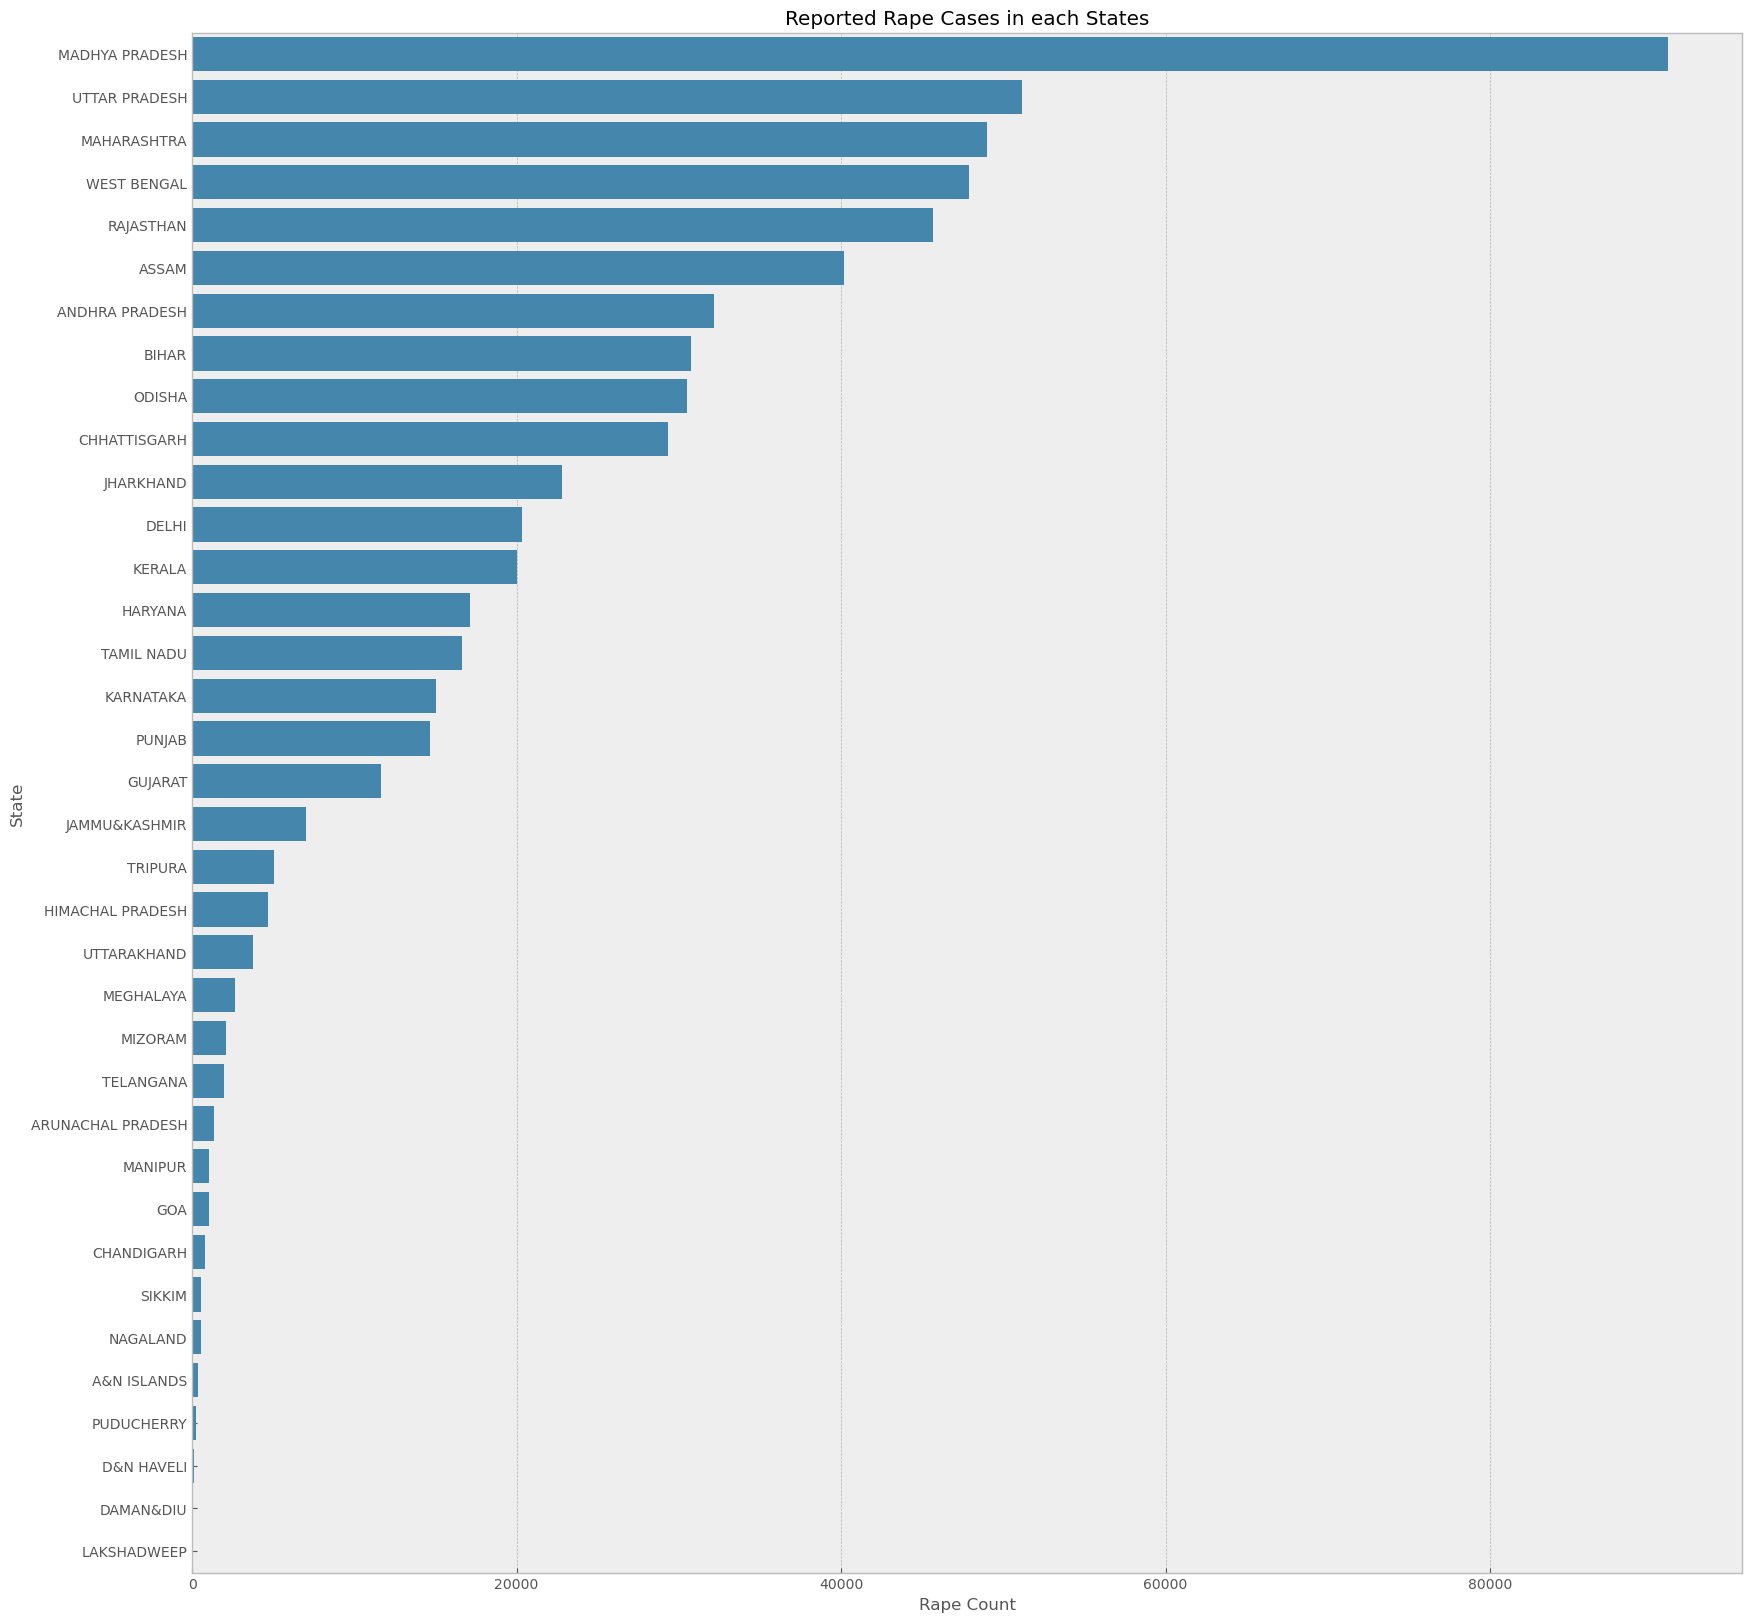

In [252]:
plt.figure(figsize=(20, 20))

sns.barplot(rape, x = 'Rape', y= 'STATE/UT')

plt.title('Reported Rape Cases in each States')
plt.xlabel('Rape Count')
plt.ylabel('State')

Kidnapping and Abduction Cases Across Different States in the Country

In [233]:
# grouping states and the total occurence for Kidnapping and Abduction
Kidnapping_and_Abduction = state_crimes[['Kidnapping and Abduction']].sort_values(by = 'Kidnapping and Abduction', ascending=False)
Kidnapping_and_Abduction.head()

,Kidnapping and Abduction
STATE/UT,
UTTAR PRADESH,135906
RAJASTHAN,66278
ASSAM,62074
WEST BENGAL,61158
BIHAR,57086


Text(0, 0.5, 'State')

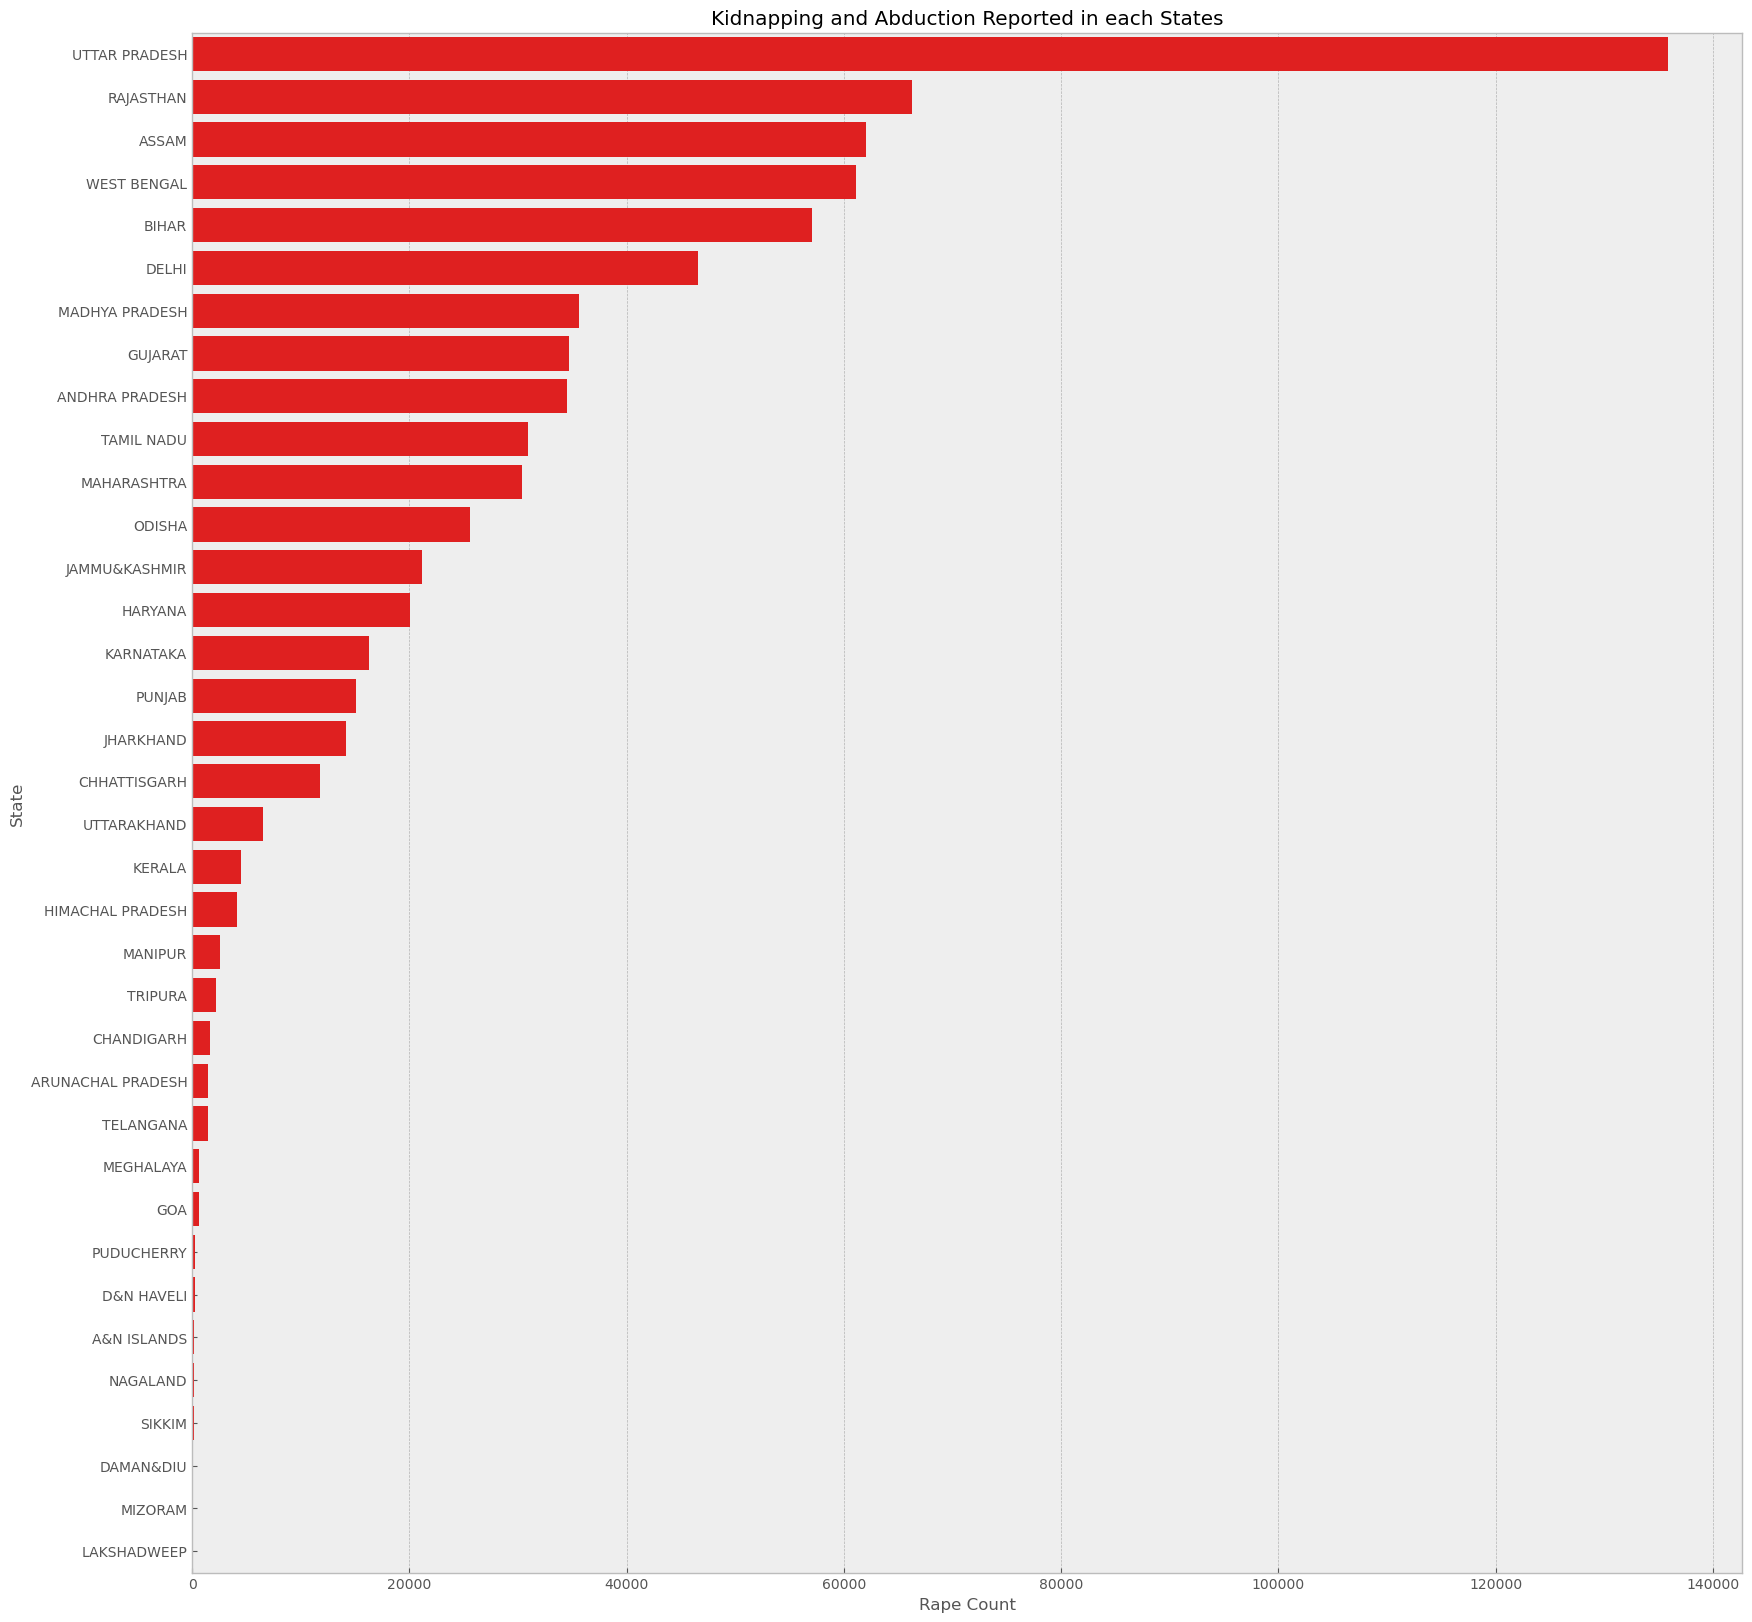

In [249]:
plt.figure(figsize=(20, 20))

sns.barplot(data = Kidnapping_and_Abduction, x = 'Kidnapping and Abduction', y= 'STATE/UT', color='red')

plt.title('Kidnapping and Abduction Reported in each States')
plt.xlabel('Rape Count')
plt.ylabel('State')

Cruelty by Husband or his Relatives Cases Reported Across Different States in the Country

In [241]:
# grouping states and the total occurence for Cruelty by Husband or his Relatives
Cruelty_by_Husband_or_his_Relatives = state_crimes[['Cruelty by Husband or his Relatives']].sort_values(by = 'Cruelty by Husband or his Relatives', ascending=False)
Cruelty_by_Husband_or_his_Relatives.head()

,Cruelty by Husband or his Relatives
STATE/UT,
WEST BENGAL,344124
ANDHRA PRADESH,280906
RAJASTHAN,262200
UTTAR PRADESH,193738
MAHARASHTRA,193202


Text(0, 0.5, 'State')

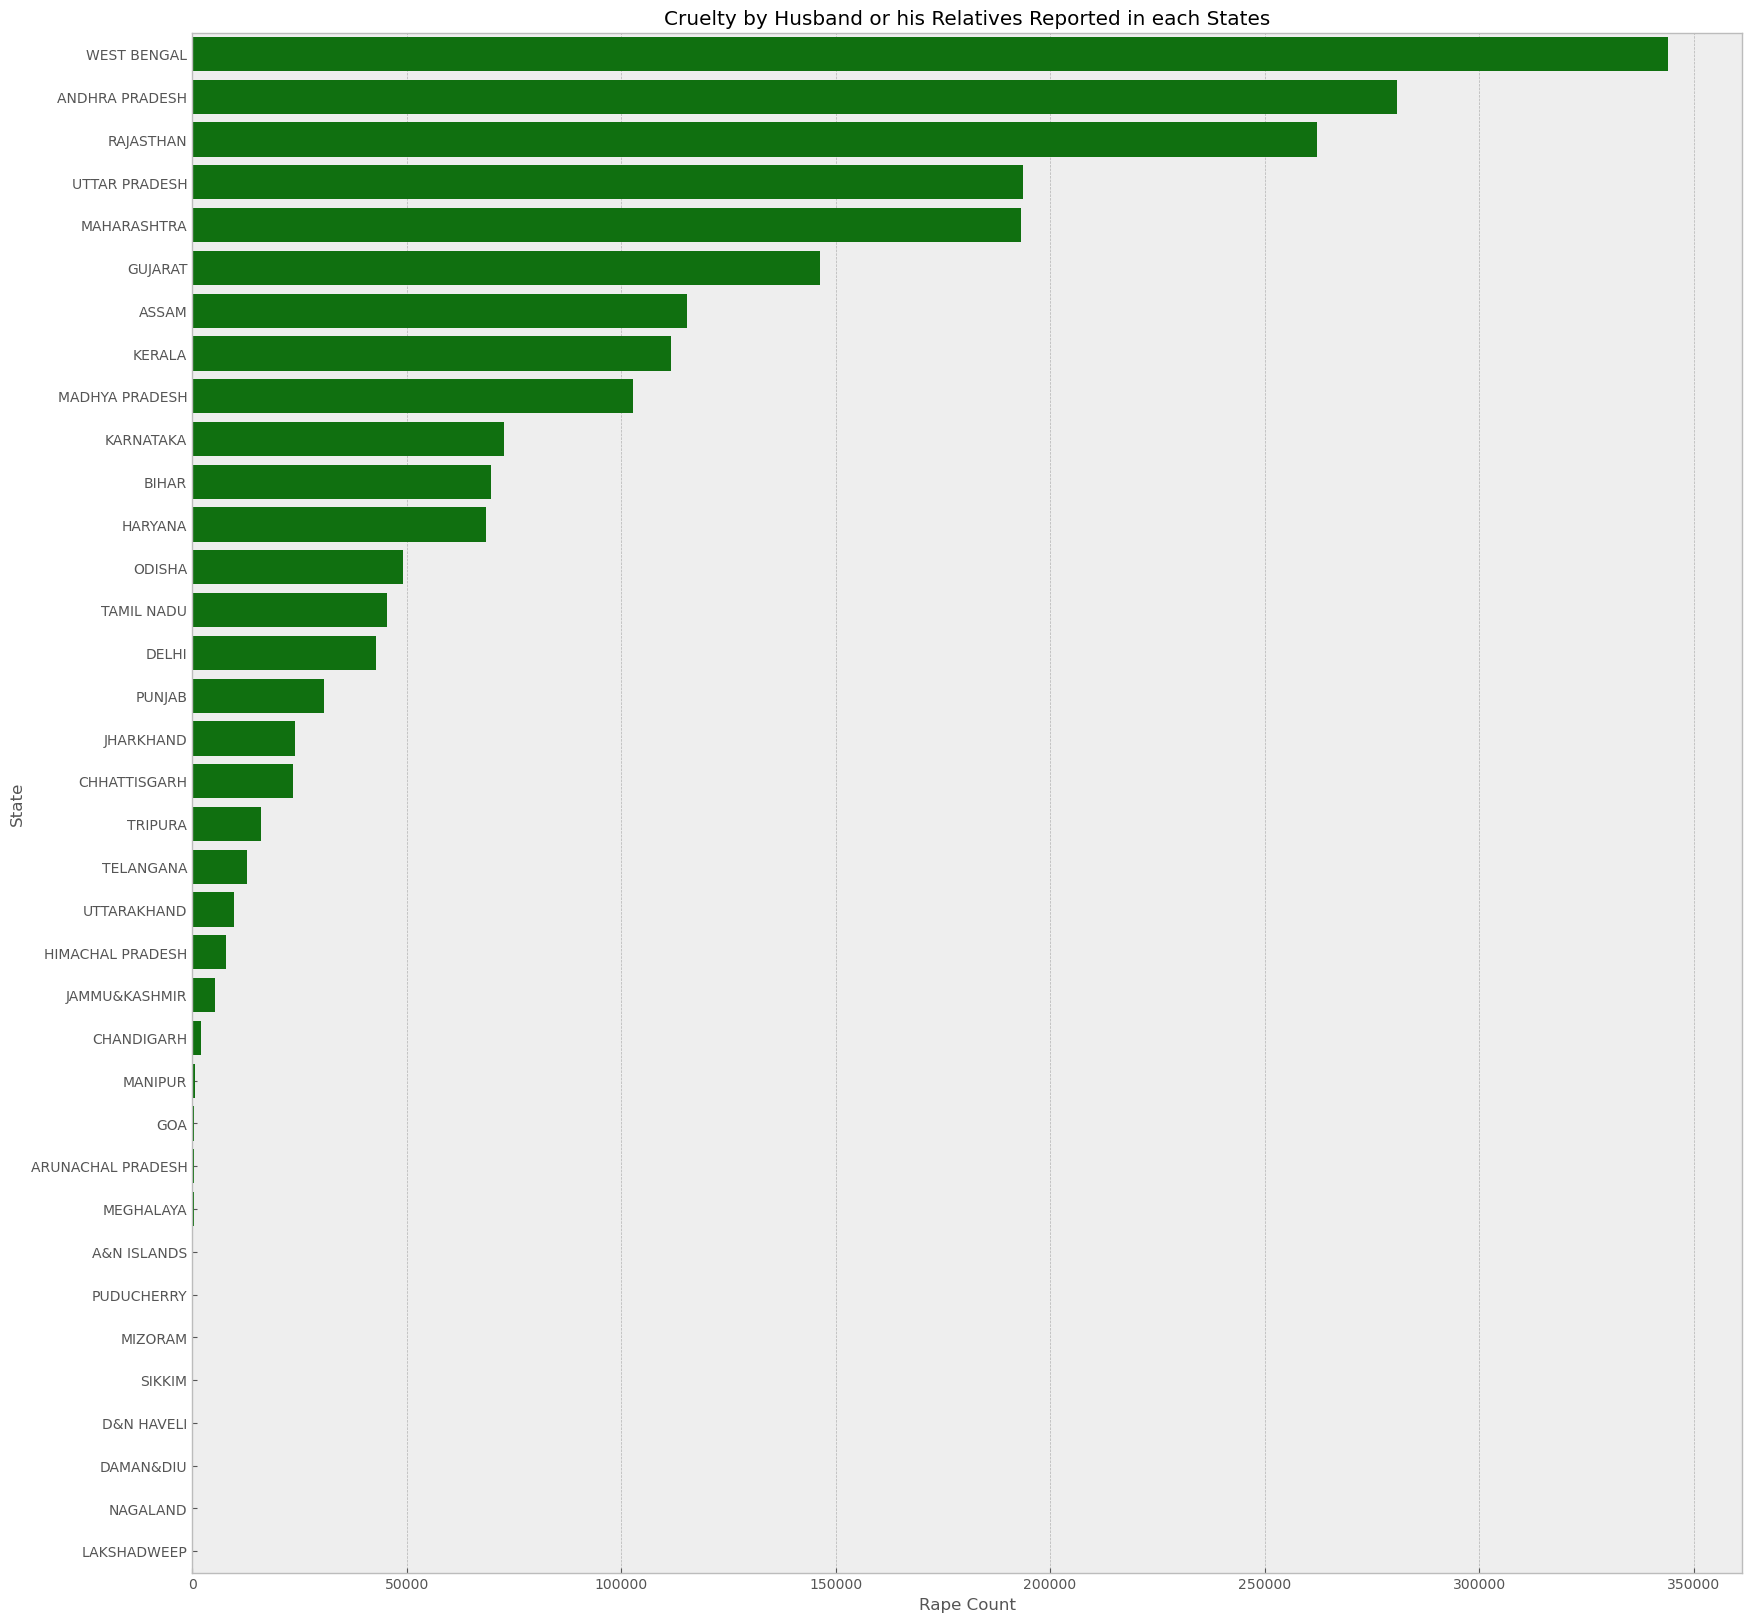

In [248]:
 plt.figure(figsize=(20, 20))

sns.barplot(data = Cruelty_by_Husband_or_his_Relatives, x = 'Cruelty by Husband or his Relatives', y= 'STATE/UT', color='green')

plt.title('Cruelty by Husband or his Relatives Reported in each States')
plt.xlabel('Rape Count')
plt.ylabel('State')

# Key Insights from the Analysis

### 1. **Steady Increase in Crime Rates**
   - Reported crimes against women consistently increased from 2001 to 2014, with a pronounced spike from 2012 onward, likely due to increased awareness and reporting post-2012 incidents.

### 2. **Predominance of Domestic-Related Crimes**
   - "Cruelty by Husband or Relatives" accounts for the largest portion of crimes (41.6%), highlighting the prevalence of domestic violence across India during this period.

### 3. **Significant Rise in Sexual Violence**
   - Incidents of rape, assault, and kidnapping all saw marked increases, especially post-2012, with sexual violence cases rising sharply in states like Madhya Pradesh, highlighting the need for targeted interventions.

### 4. **Regional Disparities**
   - **Uttar Pradesh** consistently ranks highest in kidnapping and dowry deaths, while **Andhra Pradesh** and **West Bengal** show high incidents of cruelty by husbands and relatives, underlining the need for region-specific policies and resources.

### 5. **Consistent Reporting from Select States**
   - Andhra Pradesh, West Bengal, and Uttar Pradesh remain the top contributors to crime reports, indicating either a high incidence or strong reporting mechanisms, which could warrant further investigation into reporting practices across states.

### 6. **Year-on-Year Crime Type Analysis**
   - While all crime types saw some increase, **Assault on Women** and **Insult to Modesty** showed sharper year-on-year rises than others, especially post-2008. This suggests that as societal awareness grew, more nuanced categories of assault also became recognized and reported.

### 7. **Potential Impacts of Social Movements**
   - The uptick in reports, especially after 2012, aligns with periods of intense national discourse on women’s safety, indicating a correlation between social movements and reporting frequency.